In [51]:
from matplotlib import font_manager, rc  # 한글사용 matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import codecs
import datetime 
import numpy as np
import json
import tensorflow as tf
import jpype
from konlpy.tag import Okt
from IPython.core.interactiveshell import InteractiveShell
from pandas import DataFrame as df
InteractiveShell.ast_node_interactivity = 'all'
os.chdir("C:/Users/windd/pythondata")
%matplotlib inline
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [72]:
data = pd.read_excel('수료/master_data_real.xlsx')

In [73]:
# 펀딩시작요일 원핫인코딩

data = pd.concat([data,pd.get_dummies(data['펀딩시작요일'])],axis=1)

In [197]:
# 필요한 컬럼만 추출

total = data[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '목표금액', '글업데이트수', '리워드종류수',
              '이미지수', '비디오수', '마감배송차이', '인스타존재여부', '좋아요수','댓글수','서포터수', '가독성지표',
              '와디즈팔로워수','펀딩성공여부', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부', 'Strong', 'Under', '가독성', '가독성2',
              '제목단어수',  '소비자물가', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
              '테크·가전', '패션·잡화', '푸드', '홈리빙', '와디즈기사개수', '크라우드펀딩기사개수', 'PER',
              'PBR', 'ROE', 'EBIT', '달성률']]

# 데이터 인덱스 조정

total.index = list(range(len(total)))
total = total[~(total['달성률']>40000)]

In [64]:
total = total[~(total['달성률']>1000)]


In [198]:
from sklearn.linear_model import LinearRegression

total = total[~(total['좋아요수']>1500)]
model = LinearRegression()
model.fit(total.좋아요수.values.reshape(-1,1),total.달성률.values.reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

4076

4076

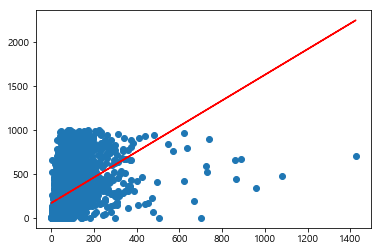

In [67]:
len(total)
plt.scatter(total.좋아요수, total.달성률)
plt.plot(total.좋아요수, model.predict(total.좋아요수.values.reshape(-1,1)), color='red')
len(total)

In [19]:
total = total[~(total['목표금액']>100)]
plt.plot(total.이미지수, model.predict(total.이미지수.values.reshape(-1,1))

SyntaxError: unexpected EOF while parsing (<ipython-input-19-71221611670b>, line 2)

In [203]:
X = total.iloc[:,:-1]
y = total['달성률']
# 학습용/테스트용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=100)



from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', 
                          random_state=1, n_jobs = -1)

rf.fit(X_train, y_train)

rf.score(X_train, y_train)
rf.score(X_test, y_test)

y_pred =rf.predict(X_test)

# 분석결과 평가

import sklearn.metrics as mt

# MSE 계산
mse = mt.mean_squared_error(y_test, y_pred)
print('MSE:',format(mse,'.3f'))

# RMSE 계산
rmse = np.sqrt(mse)
print('RMSE:',format(rmse,'.3f'))

# 결정계수 계산

r2 = mt.r2_score(y_test, y_pred) # r2_score(y_test, y_pred)
print('R2:',format(r2,'.3f'))
pd.DataFrame({'속성명':total.columns[:-1], '중요도':rf.feature_importances_}).sort_values('중요도',ascending=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

0.9656435280864195

0.8077958885655965

MSE: 513868.981
RMSE: 716.847
R2: 0.808


,속성명,중요도
16,서포터수,0.372184
14,좋아요수,0.300858
7,목표금액,0.124295
15,댓글수,0.026105
23,Strong,0.018975
10,이미지수,0.011956
18,와디즈팔로워수,0.011030
26,가독성2,0.010331
12,마감배송차이,0.010100
39,크라우드펀딩기사개수,0.009686


In [107]:
from sklearn.linear_model import LinearRegression

total = total[~(total['서포터수']>7000)]
model = LinearRegression()
model.fit(total.서포터수.values.reshape(-1,1),total.달성률.values.reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

4076

4076

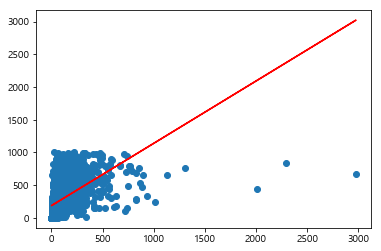

In [70]:
len(total)

plt.scatter(total.서포터수, total.달성률)
plt.plot(total.서포터수, model.predict(total.서포터수.values.reshape(-1,1)), color='red')
len(total)

In [140]:
total_list = total.columns
len(total_list)
total_list

Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '목표금액', '글업데이트수',
       '리워드종류수', '이미지수', '비디오수', '마감배송차이', '인스타존재여부', '좋아요수', '댓글수', '서포터수',
       '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부', 'Strong', 'Under', '가독성',
       '가독성2', '제목단어수', '펀딩성공여부', '소비자물가', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티',
       '여행·레저', '테크·가전', '패션·잡화', '푸드', '홈리빙', '와디즈기사개수', '크라우드펀딩기사개수', 'PER',
       'PBR', 'ROE', 'EBIT', '달성률'],
      dtype='object')

<Figure size 2880x2880 with 0 Axes>

Text(0.5,0,'Tue')

Text(0,0.5,'달성률')

Text(0.5,0,'Wed')

Text(0,0.5,'달성률')

Text(0.5,0,'Thu')

Text(0,0.5,'달성률')

Text(0.5,0,'Fri')

Text(0,0.5,'달성률')

Text(0.5,0,'Sat')

Text(0,0.5,'달성률')

Text(0.5,0,'Sun')

Text(0,0.5,'달성률')

Text(0.5,0,'목표금액')

Text(0,0.5,'달성률')

Text(0.5,0,'글업데이트수')

Text(0,0.5,'달성률')

Text(0.5,0,'리워드종류수')

Text(0,0.5,'달성률')

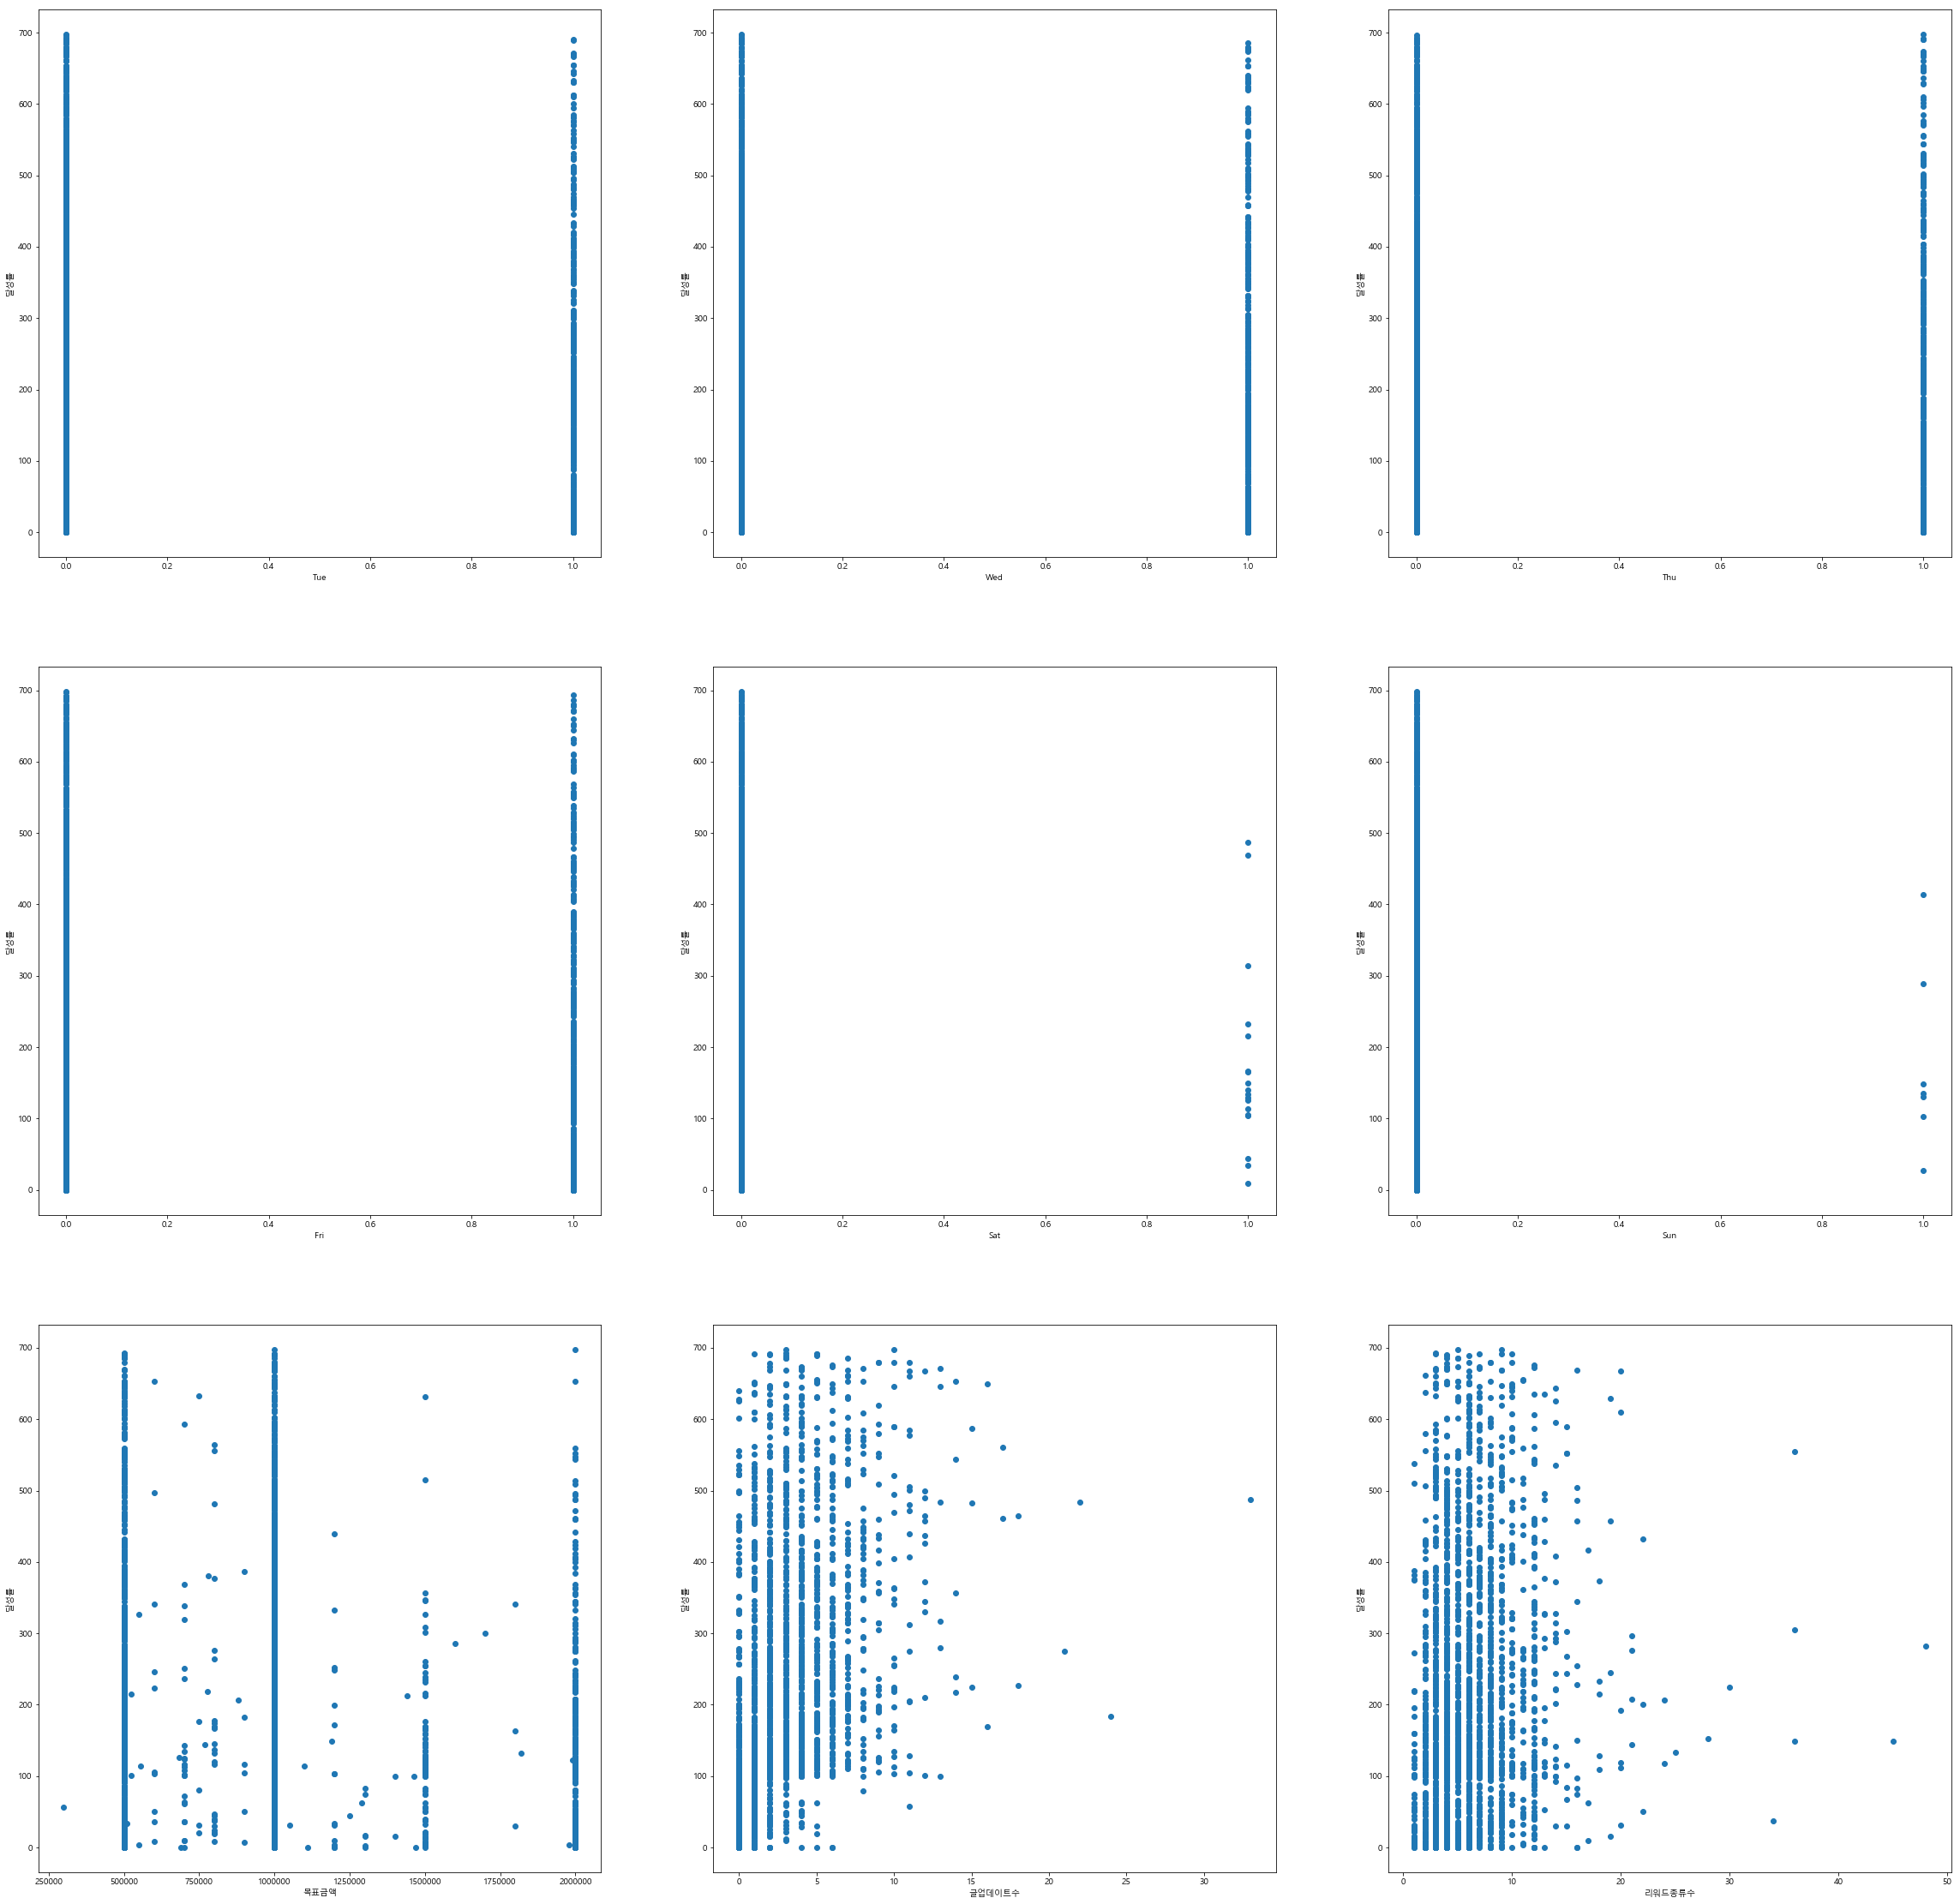

In [171]:
plt.figure(figsize=(40,40))

for i in range(1,10,1):
    plt.subplot(330+i)
    plt.scatter(total[total_list[i]], total.달성률)
    plt.xlabel(total_list[i])
    plt.ylabel('달성률')

In [171]:
data = pd.read_excel('수료/master_data_real.xlsx')

In [172]:
# 펀딩시작요일 원핫인코딩

data = pd.concat([data,pd.get_dummies(data['펀딩시작요일'])],axis=1)

In [106]:
# 필요한 컬럼만 추출

total = data[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '목표금액', '글업데이트수', '리워드종류수',
              '이미지수', '비디오수', '마감배송차이', '좋아요수','댓글수','서포터수',
              '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부', 'Strong', 'Under', '가독성', '가독성2',
              '제목단어수',  '소비자물가','달성률']]

# 데이터 인덱스 조정

total.index = list(range(len(total)))

In [102]:
len(total[total['달성률']<100])

1121

In [109]:
total_sorted = total.sort_values('달성률',ascending=True)
total_sorted.index = list(range(len(total_sorted)))

In [110]:
target_list = []

for i in range(len(total)):
    if total_sorted.달성률[i] < 100:
        target_list.append(0)
    elif total_sorted.달성률[i] < 700:
        target_list.append(1)
    else:
        target_list.append(2)

In [111]:
total_sorted['타겟'] = target_list

In [112]:
total_sorted.pivot_table(index = '타겟', aggfunc = 'count', values = '달성률')

,달성률
타겟,
0,1121
1,2595
2,1563


In [113]:
total_data = total_sorted.drop(columns = ['달성률'])

In [114]:

X = total_data.iloc[:, :-1]
y = total_data.타겟

# 학습용/테스트용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
                                                    
                             

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
rf.score(X_train, y_train)
rf.score(X_test, y_test)

y_pred = rf.predict(X_test)

1.0

0.8712121212121212

In [117]:
import sklearn.metrics as mt

mt.accuracy_score( y_pred, y_test)
mt.confusion_matrix(y_pred, y_test)

0.8712121212121212

array([[289,  32,   0],
       [ 44, 710,  81],
       [  0,  47, 381]], dtype=int64)

In [118]:
pd.DataFrame({'속성명':total.columns[:-1], '중요도':rf.feature_importances_}).sort_values('중요도',ascending=False)

,속성명,중요도
15,서포터수,0.196856
13,좋아요수,0.136230
18,과거성공프로젝트수,0.109740
8,글업데이트수,0.108220
14,댓글수,0.084969
7,목표금액,0.065713
16,와디즈팔로워수,0.032899
10,이미지수,0.032010
20,Strong,0.026528
12,마감배송차이,0.026417


In [143]:
len(total[total['달성률']<100])

1121

(array([690., 332., 281., 214., 180., 155., 144., 128., 101., 106.,  83.,
         73.,  87.,  76.,  64.,  80.,  50.,  42.,  40.,  28.]),
 array([100.  , 144.95, 189.9 , 234.85, 279.8 , 324.75, 369.7 , 414.65,
        459.6 , 504.55, 549.5 , 594.45, 639.4 , 684.35, 729.3 , 774.25,
        819.2 , 864.15, 909.1 , 954.05, 999.  ]),
 <a list of 20 Patch objects>)

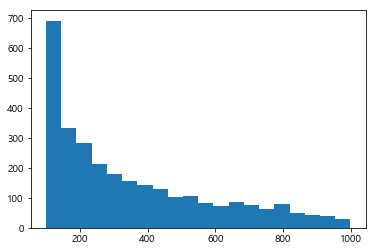

In [167]:
plt.hist(total.달성률[(total['달성률']>=100) & (total['달성률']<1000)], rwidth=10,bins=20)


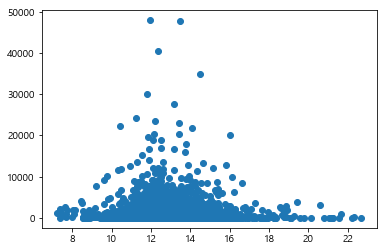

In [192]:
plt.scatter(data.가독성2, data.달성률)

In [193]:
read = []
data.index = list(range(len(data)))

for i in range(len(data)):
    if data.가독성2[i] < 8 :
        read.append(0)
    elif data.가독성2[i] < 10:
        read.append(1)
    elif data.가독성2[i] < 14:
        read.append(2)
    elif data.가독성2[i] < 16:
        read.append(3)
    else:
        read.append(4)

In [194]:
data['가독성지표'] = read

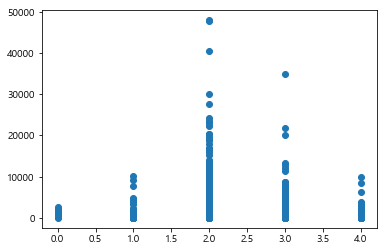

In [195]:
plt.scatter(data.가독성지표, data.달성률)

In [188]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(data2.가독성3.values.reshape(-1,1),data2.달성률.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

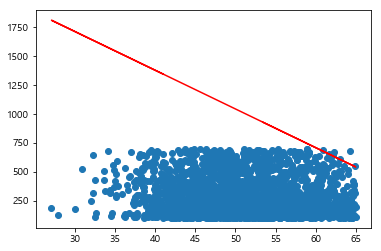

In [190]:
data2 = data2[~(data2['가독성3']>65)]
data2 = data2[(data2['달성률']>=100)]
data2 = data2[(data2['달성률']<700)]

plt.scatter(data2.가독성3,data2.달성률)
plt.plot(data2.가독성3, model.predict(data2.가독성3.values.reshape(-1,1)), color='red')

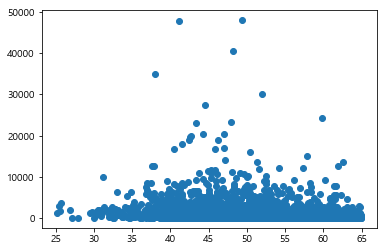

In [185]:
plt.scatter(data2.가독성3,data2.달성률)